problem statement

with the upcoming diwali season, there is a need to develop a comprehensive marketing startegy to maximize sales and optimize inventory management for a retail business.

based on histrorical sales data, the goal is to identify key regional trends, zone-wwise strategies, product focus areas, insight from product ids, order frequency tactics, and targeted demograpgic segments.

the objectivies is to leverage this information to tailor marketing efforts, inventory planning, and promotional activities effecentily, ultimately driving higher sales during the diwali period.


step : IMPORT PYTHON LIBARARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv(r"C:\Users\admin\Documents\python\diwali\Diwali.csv",encoding= 'unicode_escape')

In [4]:
df1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df1.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [6]:
df1.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
df1.shape

(11251, 15)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df1.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [10]:
for col in df1.columns:
    print(f"{col}: {df1[col].unique()}")

User_ID: [1002903 1000732 1001990 ... 1001542 1004378 1005258]
Cust_name: ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
Product_ID: ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
Gender: ['F' 'M']
Age Group: ['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
Age: [28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59]
Marital_Status: [0 1]
State: ['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
Zone: ['Western' 'Southern' 'Central' 'Northern' 'Eastern']
Occupation: ['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail' 'Hospital

DATA cleaning

In [11]:
df1.isnull().sum()
#df1.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [12]:
df1.duplicated().sum()

np.int64(8)

data deduction 

In [13]:
df1.drop(['User_ID','Status','unnamed1'],axis=1, inplace=True)

In [14]:
df1.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


HANDLING THE INCONSISTANCY ERROR

In [15]:
df1['Amount'].fillna(df1['Amount'].mean(),inplace=True)

In [16]:
df1.isnull().sum()

Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
df1.shape

(11251, 12)

feature engineering

In [18]:
df1['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [19]:
df1['Age_Category']=df1['Age Group'].replace({'0-17':'Tean','18-25':'Young','26-35':'Adult','36-45':'Adult','46-50':'Middle Age','51-55':'Middle Age','55+':'Senior'})

In [20]:
df1['Gender'].replace({'F':'Female', 'M':'Male'},inplace=True)

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11251.0,35.421207,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,0.420318,0.493632,0.0,0.0,0.0,1.0,1.0
Orders,11251.0,2.489290,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11251.0,9453.610858,5219.569870,188.0,5443.5,8110.0,12671.0,23952.0


In [22]:
df1.describe(include='object').T

,count,unique,top,freq
Cust_name,11251,1250,Vishakha,42
Product_ID,11251,2351,P00265242,53
Gender,11251,2,Female,7842
Age Group,11251,7,26-35,4543
State,11251,16,Uttar Pradesh,1946
Zone,11251,5,Central,4296
Occupation,11251,15,IT Sector,1588
Product_Category,11251,18,Clothing & Apparel,2655
Age_Category,11251,5,Adult,6829


In [23]:
cat_cols=df1.select_dtypes(exclude=['int','float']).columns.tolist()
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category', 'Age_Category']
Numerical Variables:
['Age', 'Marital_Status', 'Orders', 'Amount']


Age


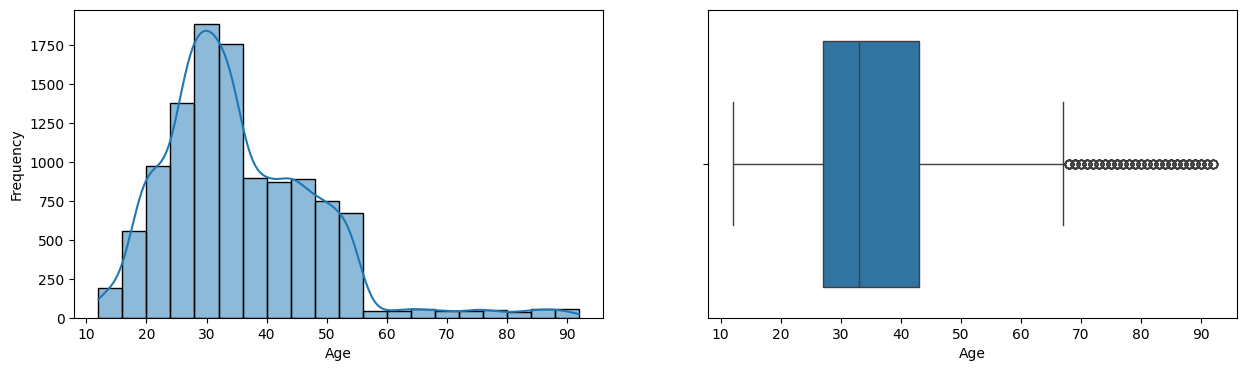

Marital_Status


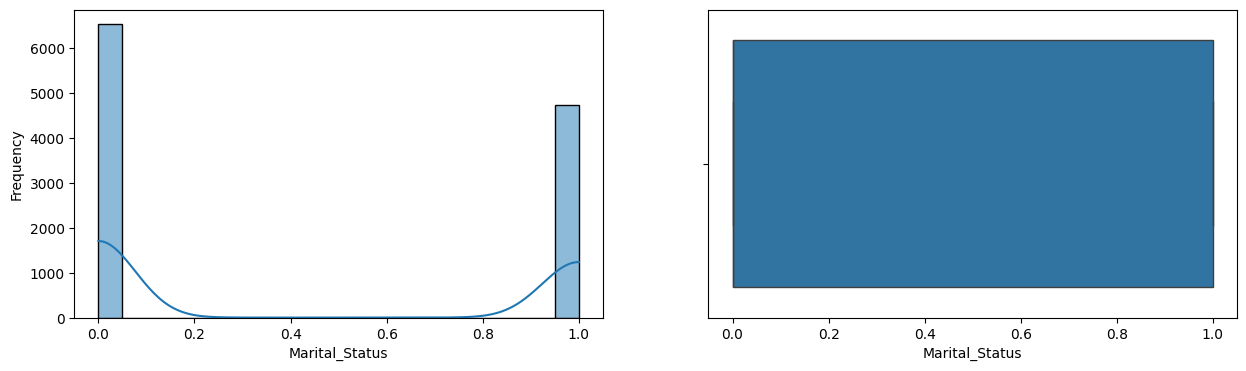

Orders


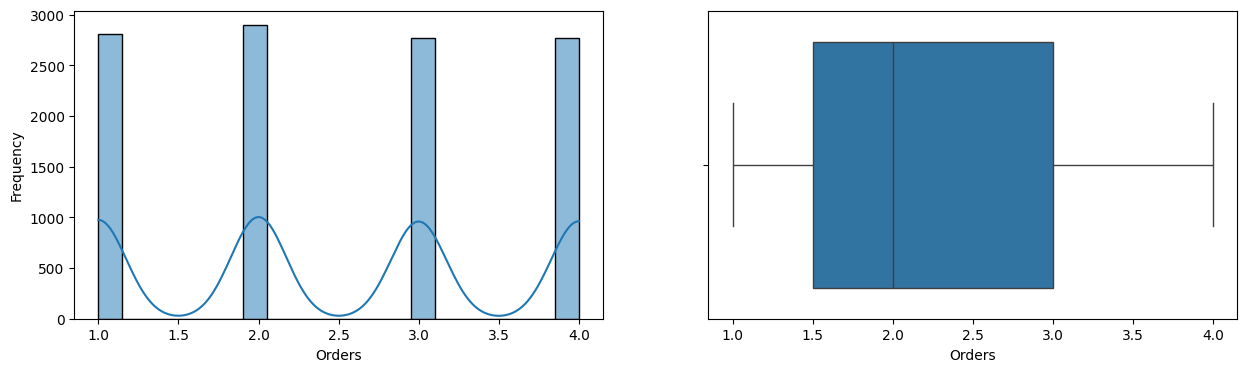

Amount


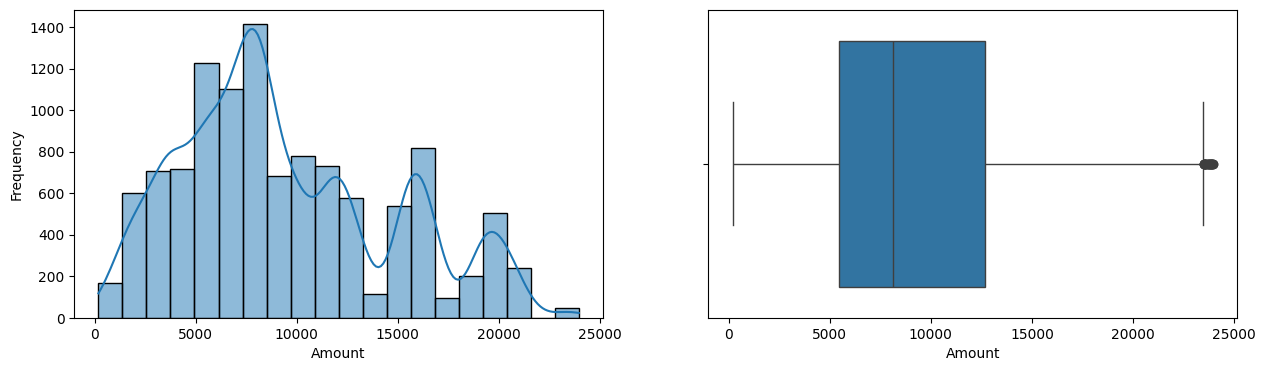

In [24]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df1[col],kde=True,alpha=0.5,bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df1[col])
    plt.xlabel(col)
    
    plt.show()

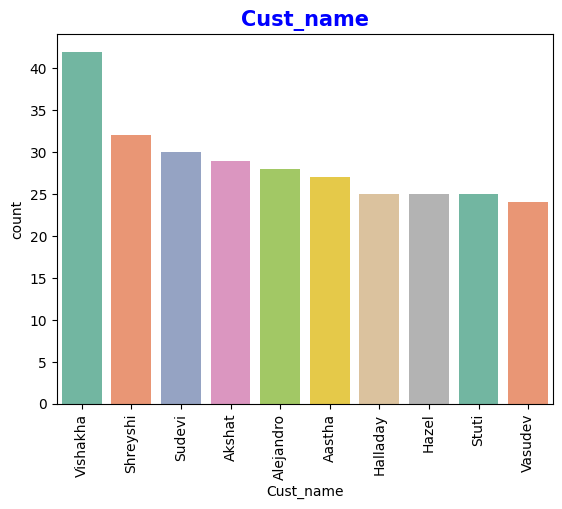

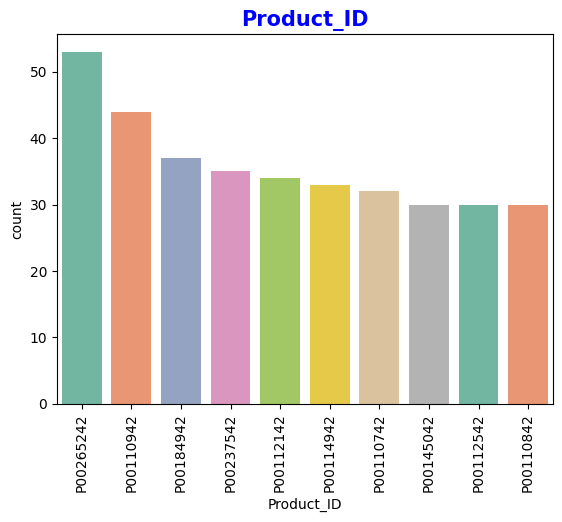

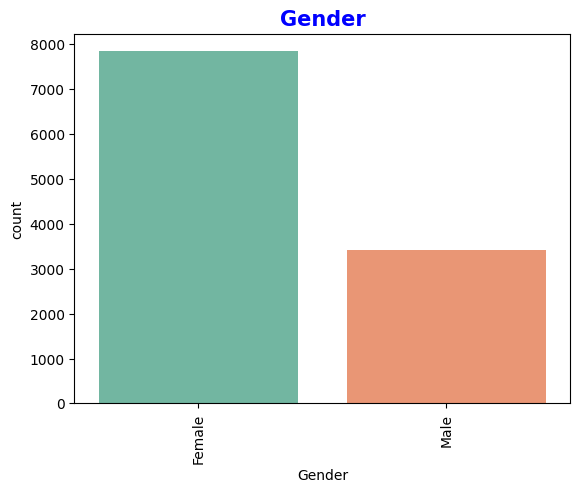

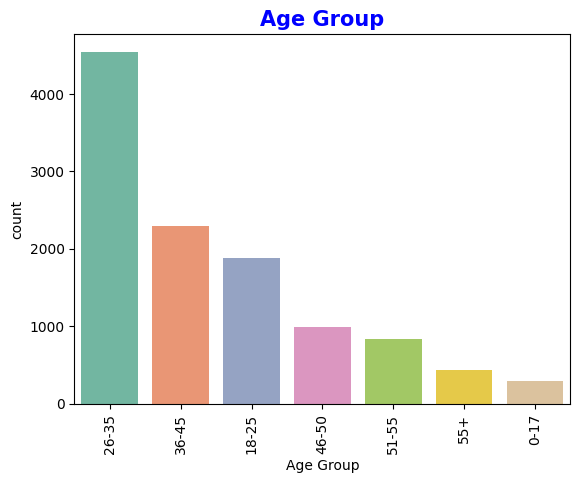

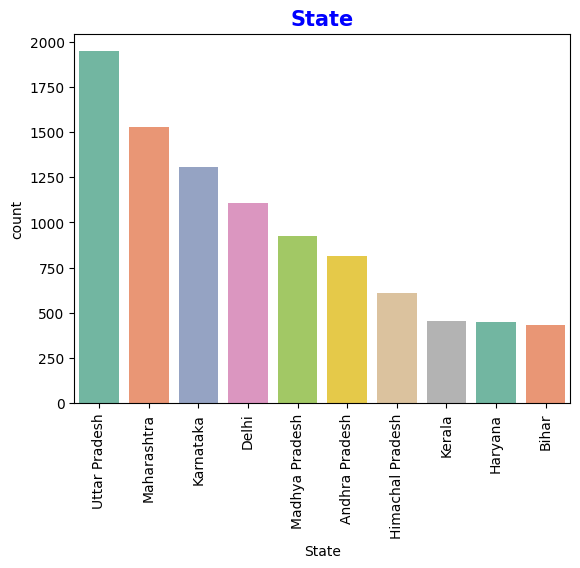

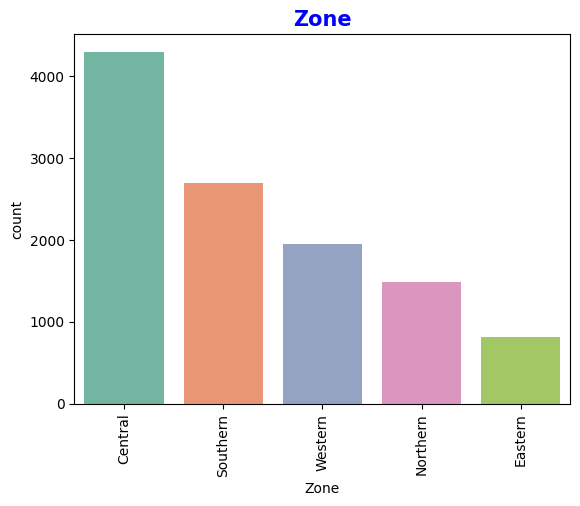

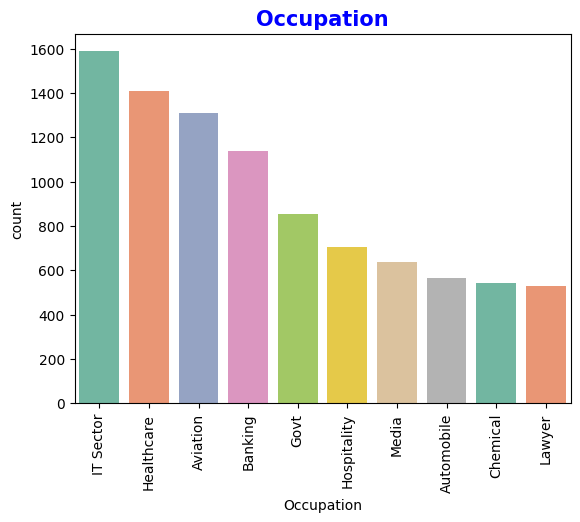

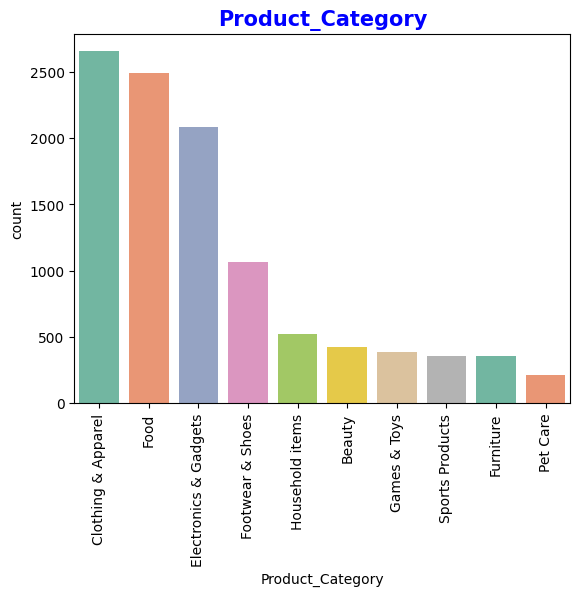

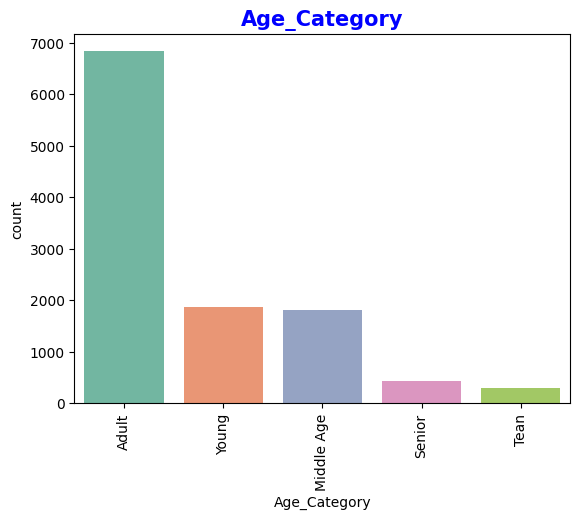

In [25]:
for col in cat_cols:
    sns.countplot(x=col, data=df1,order=df1[col].value_counts().head(10).index, palette='Set2')
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=15, fontweight='bold', color='blue')
    plt.show()

BIVARIATE

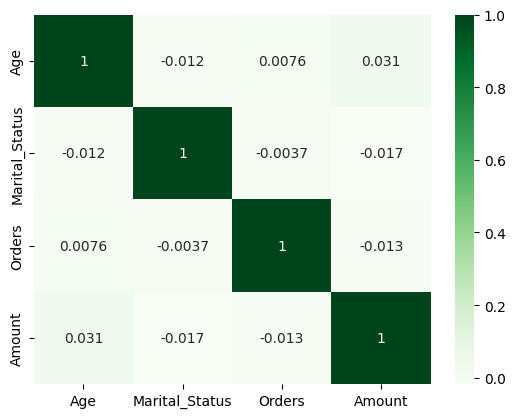

In [26]:
corr = df1[num_cols].corr()
sns.heatmap(corr,annot=True, cmap='Greens')
plt.show()

step:8 EDA BIVARIATE ANALAYSIS:

TOP SELLING PRODUCTS:

In [27]:
df1.columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Age_Category'],
      dtype='object')

In [29]:
df1.groupby(['Product_ID']).agg({'Amount':'sum'}).head(1)

,Amount
Product_ID,
P00000142,248716.0


In [30]:
top_selling = df1[df1['Product_ID']== 'P00000142'].groupby('Product_Category')['Amount'].sum()
print(top_selling.max())

125793.0


In [31]:
df1['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

In [32]:
df1['Product_ID'].value_counts().head()

Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
Name: count, dtype: int64

In [33]:
df1['Product_ID'].value_counts().tail()

Product_ID
P00326042    1
P00255342    1
P00347942    1
P00273642    1
P00035742    1
Name: count, dtype: int64

In [34]:
search_title = "P00265242"

result= df1[df1['Product_ID'].str.contains(search_title, case=False)]

result

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Category
62,Bruce,P00265242,Female,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,21325.0,Adult
208,Murray,P00265242,Female,46-50,50,1,Uttar Pradesh,Central,Banking,Furniture,1,20588.0,Middle Age
349,Ann,P00265242,Female,26-35,32,0,Karnataka,Southern,Retail,Footwear & Shoes,4,20260.0,Adult
591,Craig,P00265242,Female,55+,63,0,Madhya Pradesh,Central,Agriculture,Food,3,19487.0,Senior
812,Jeremy,P00265242,Female,18-25,20,1,Haryana,Northern,Food Processing,Food,4,19175.0,Young
963,Dipali,P00265242,Male,51-55,53,1,Gujarat,Western,Aviation,Food,1,18959.0,Middle Age
1309,Akshata,P00265242,Female,26-35,35,0,Delhi,Central,Food Processing,Footwear & Shoes,1,16506.0,Adult
1347,Hughes,P00265242,Female,36-45,38,0,Delhi,Central,Retail,Footwear & Shoes,2,16451.0,Adult
1561,Steven,P00265242,Female,0-17,12,0,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0,Tean
1630,Cortes,P00265242,Female,55+,81,1,Madhya Pradesh,Central,IT Sector,Food,3,15917.0,Senior


In [35]:
print(f"Net sales {round(df1['Amount'].sum())}")

Net sales 106362576


In [36]:
#highest order

total_order_ID = df1.groupby('Product_ID')['Orders'].sum().nlargest(1)
total_order_ID

Product_ID
P00265242    127
Name: Orders, dtype: int64

In [37]:
total_order_Zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_Zone

Zone
Central     10640
Southern     6744
Western      4881
Northern     3727
Eastern      2015
Name: Orders, dtype: int64

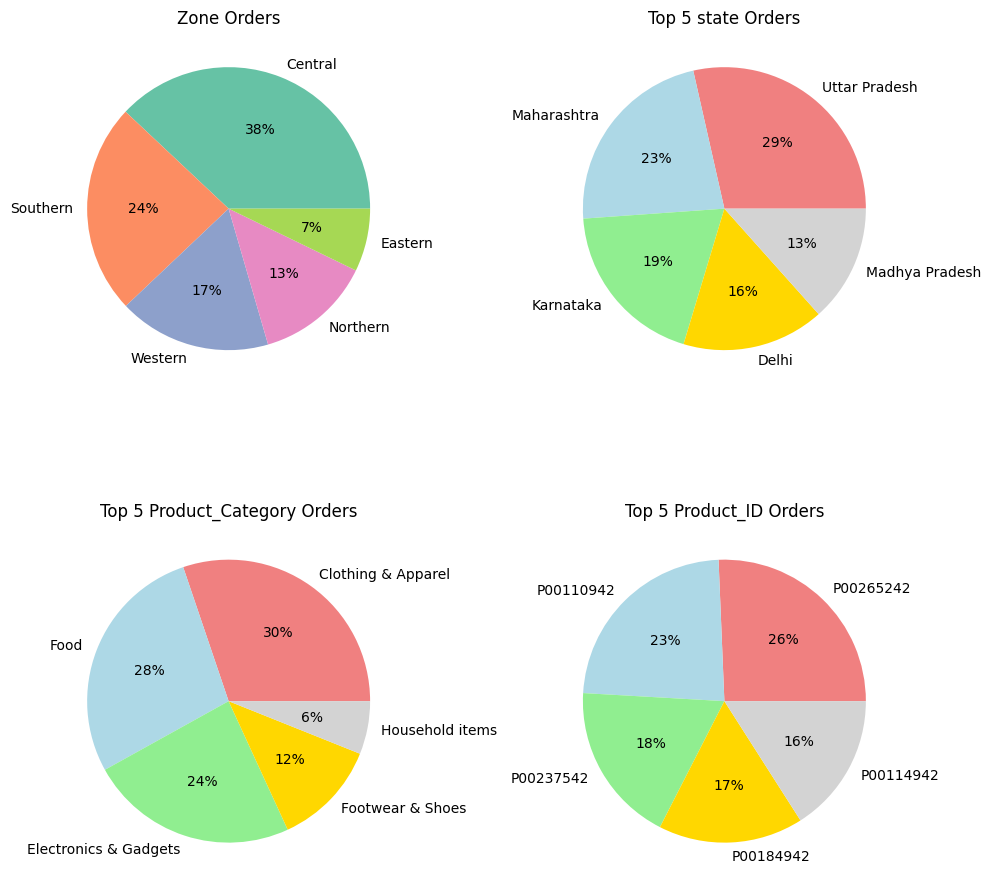

In [38]:
total_order_Zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df1.groupby('State')['Orders'].sum().sort_values(ascending=False).head()
total_order_category = df1.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).head()
total_order_ID = df1.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head()

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.pie(total_order_Zone, labels=total_order_Zone.index, autopct='%1.f%%', colors=sns.color_palette('Set2'))
plt.title("Zone Orders")

plt.subplot(2, 2, 2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 state Orders")

plt.subplot(2, 2, 3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 Product_Category Orders")

plt.subplot(2, 2, 4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 Product_ID Orders")

plt.tight_layout()
plt.show()


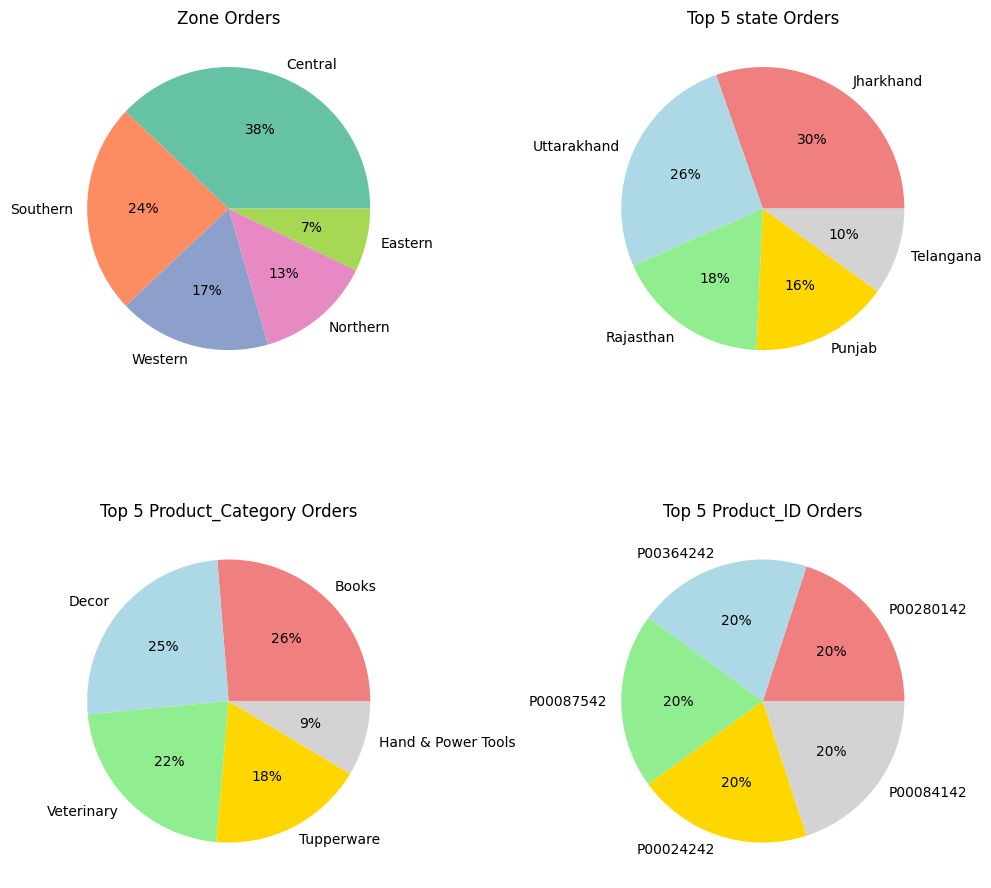

In [39]:
total_order_Zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df1.groupby('State')['Orders'].sum().sort_values(ascending=False).tail()
total_order_category = df1.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).tail()
total_order_ID = df1.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).tail()

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.pie(total_order_Zone, labels=total_order_Zone.index, autopct='%1.f%%', colors=sns.color_palette('Set2'))
plt.title("Zone Orders")

plt.subplot(2, 2, 2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 state Orders")

plt.subplot(2, 2, 3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 Product_Category Orders")

plt.subplot(2, 2, 4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen','gold','lightgrey'])
plt.title("Top 5 Product_ID Orders")

plt.tight_layout()
plt.show()


sales analysis

In [45]:
df1.columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Age_Category'],
      dtype='object')

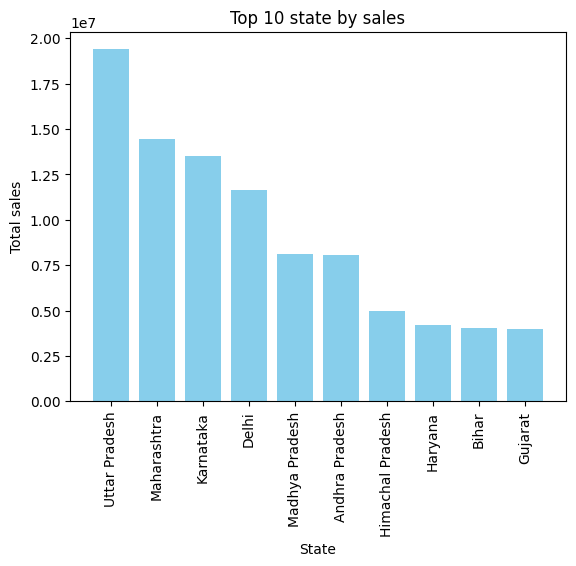

In [47]:
state_sale = df1.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.bar(state_sale.index, state_sale.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Total sales')
plt.title('Top 10 state by sales')
plt.xticks(rotation=90)
plt.show()


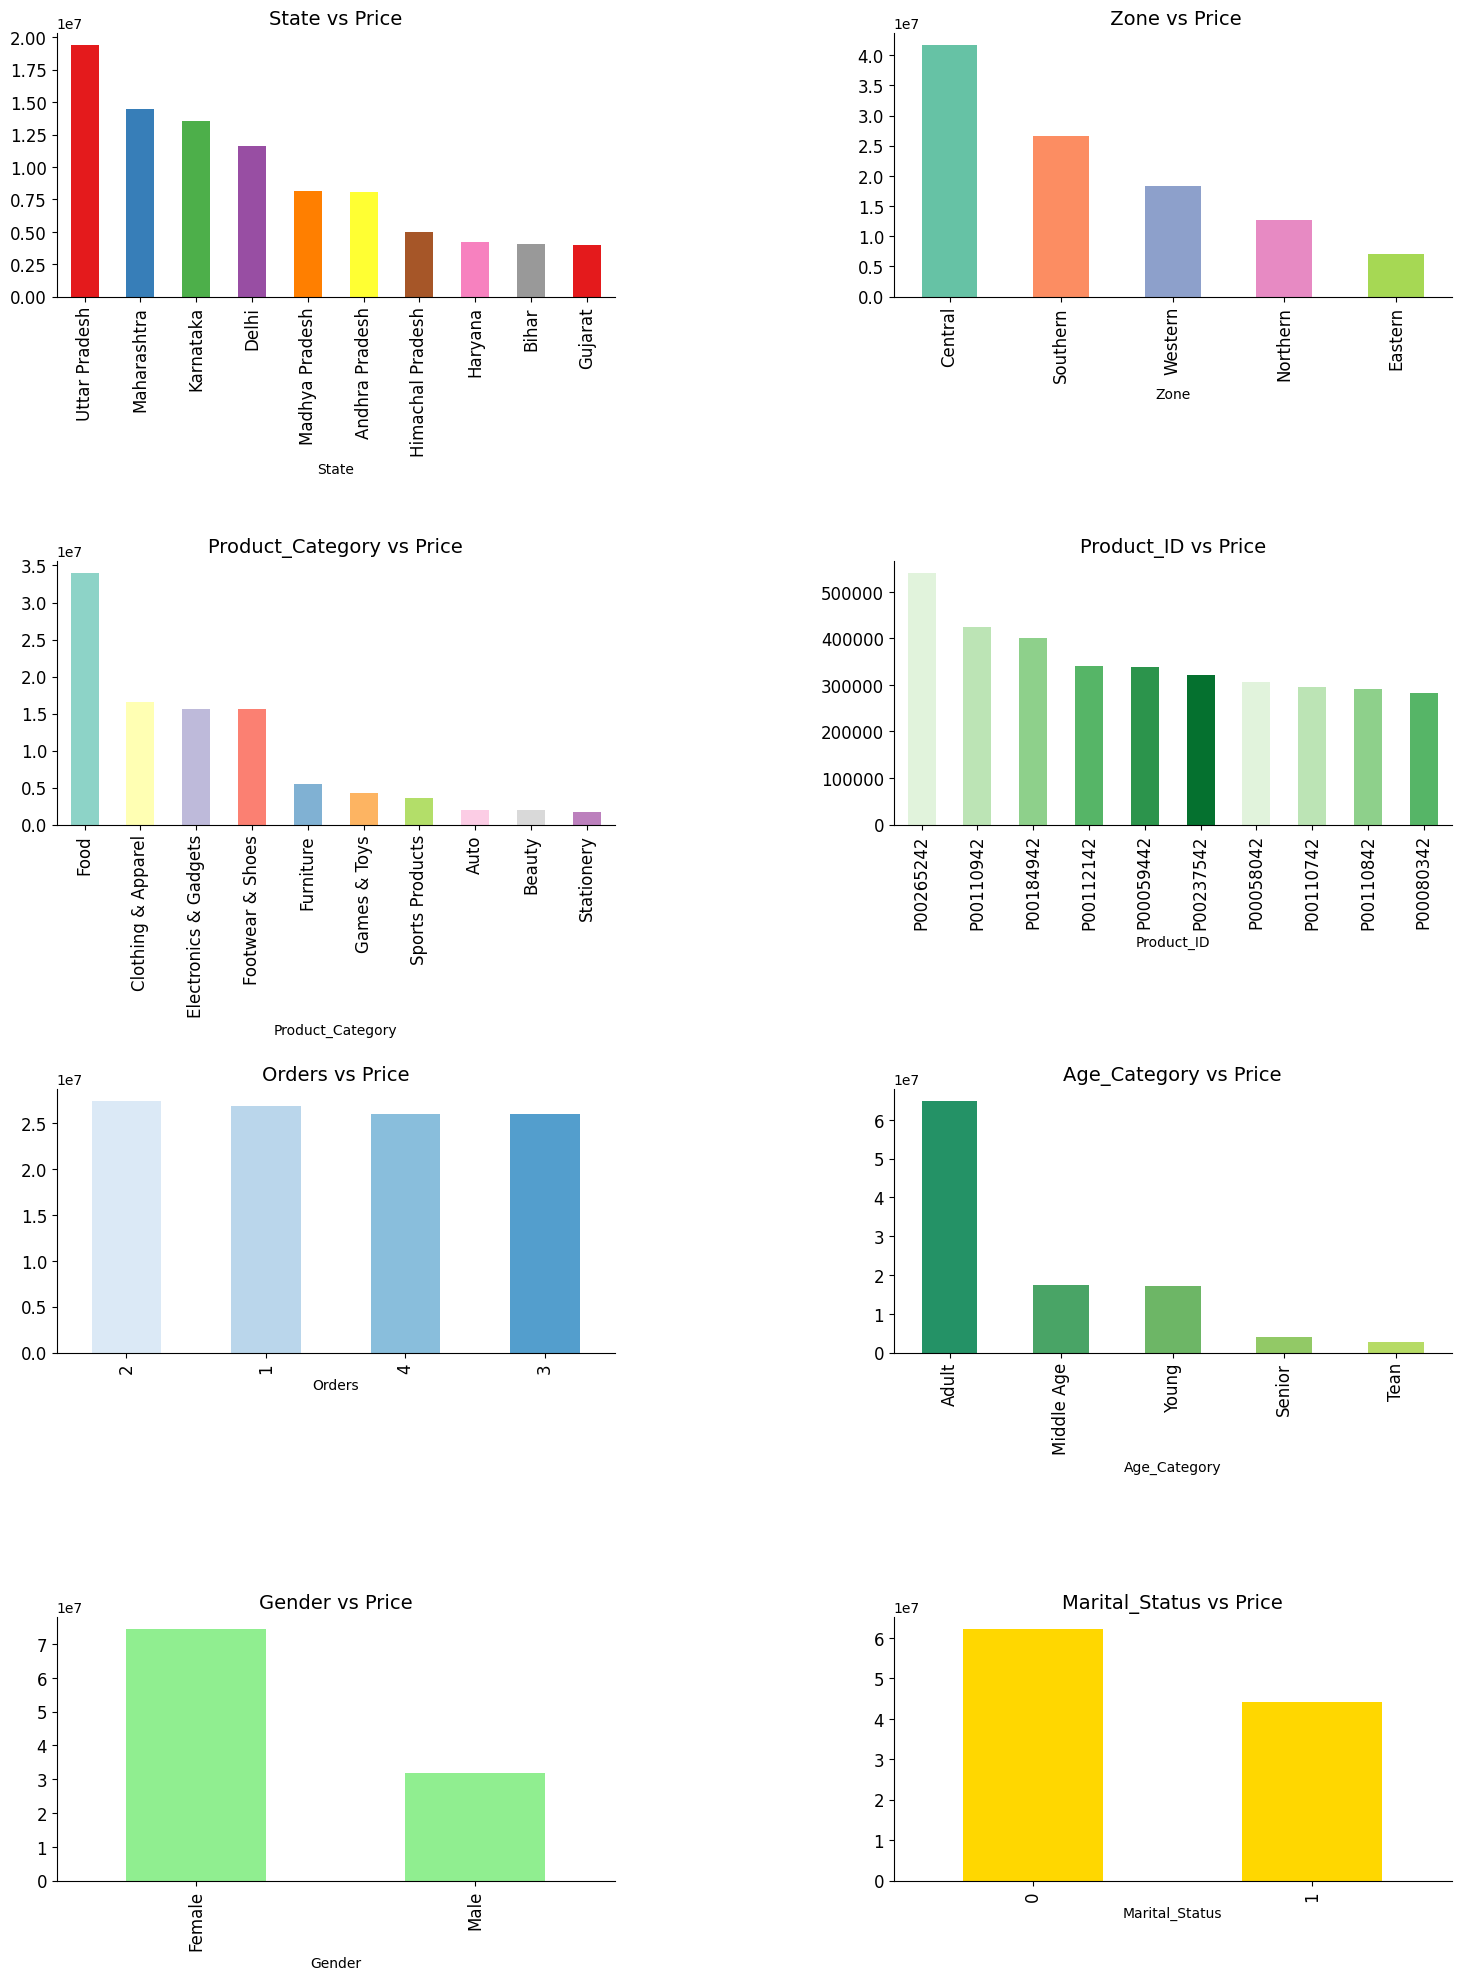

In [46]:
fig, axarr= plt.subplots(4,2, figsize=(18, 24))

df1.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][0], fontsize=12, color=sns.color_palette('Set1'))
axarr[0][0].set_title("State vs Price",fontsize=14 )

df1.groupby('Zone')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][1], fontsize=12, color=sns.color_palette('Set2'))
axarr[0][1].set_title(" Zone vs Price",fontsize=14 )

df1.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12, color=sns.color_palette('Set3'))
axarr[1][0].set_title("Product_Category vs Price",fontsize=14 )

df1.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12, color=sns.color_palette('Greens'))
axarr[1][1].set_title("Product_ID vs Price",fontsize=14 )

df1.groupby('Orders')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12, color=sns.color_palette('Blues'))
axarr[2][0].set_title("Orders vs Price",fontsize=14 )

df1.groupby('Age_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12, color=sns.color_palette('summer'))
axarr[2][1].set_title("Age_Category vs Price",fontsize=14 )

df1.groupby('Gender')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][0], fontsize=12, color='lightgreen')
axarr[3][0].set_title("Gender vs Price",fontsize=14 )

df1.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][1], fontsize=12, color='gold')
axarr[3][1].set_title("Marital_Status vs Price",fontsize=14)



plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()